In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Consider the function,
$$f(x) = \sum_{i=1}^{8} \log \left(0.01 + (\alpha_i - x)^2 \right),$$
with $\boldsymbol{\alpha} = \{-4.2, -2.85, -2.30, -1.02, 0.70, 0.98, 2.72, 3.50\}$.

In [0]:
def f(x):
  a = np.array([-4.2, -2.85, -2.30, -1.02, 0.70, 0.98, 2.72, 3.50])
  return np.sum(np.log(0.01 + (a - x)**2))

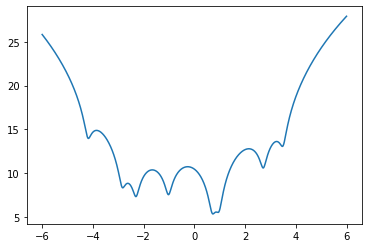

In [64]:
xi    = np.linspace(-6, 6, 1000)
fvec  = np.vectorize(f)
fi    = fvec(xi)
plt.plot(xi, fi)

(0, 1)

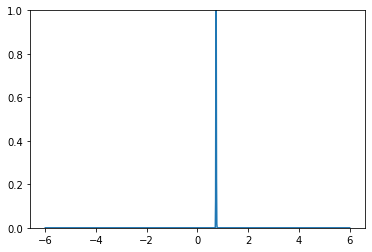

In [65]:
def probDist(x, Temp):
  """returns the appropriate probability distribution"""
  return np.exp(-fvec(x)/Temp)

Temp = 0.01
plt.plot(xi, probDist(xi, Temp)/max(probDist(xi, Temp)))
plt.ylim(0,1)

In [66]:
xi[np.argmin(fi)]

0.7387387387387383

# Code to Populate


In [0]:
def proposal(xc, delta):
    xn = np.random.uniform(xc-delta, xc+delta)
    return xn

def metro_accept(xn, xc, fc):
    acc   = False
    ratio = f(xn)/fc
    
    if ratio > 1.:
        acc = True
    elif np.random.rand() < ratio:
        acc = True
    return acc


def EstimateT0(nsteps=1000, a0=0.8):
  pass
# return T0

def driver(nsteps=50000, alpha=0.995, L=10, delta=1.0):

  # setup initial temperature
  T0 = 100.0
  #    T0   = EstimateT0(c, nsteps=1000, a0=0.8)
  Temp = T0

  # starting position
  x    = -4.;
  fx   = fvec(x)

  # best solution
  xbest   = x
  fbest   = fx
  numSucc = 0

  # record SA as a matrix
  recx      = np.zeros((int(nsteps/L),5))
  recx[0,:] = np.array([x, fx, xbest, fbest, Temp])

  # main loop
  for iMCS in range(nsteps):
    xn  = proposal(x, delta)
    acc = metro_accept(xn, x, fx)

    if acc:
      x        = xn
      fx       = f(xn)
      numSucc += 1
              
    if iMCS % L == 0:  # time to change Temp

      if fx < fbest: # update best?
        fbest = fx; xbest = x 
      if np.random.rand() < 0.05: # reseed?
        x    = xbest; fx = fbest

      recx[int(iMCS/L),:] = np.array([x, fx, xbest, fbest, Temp])

      Temp = Temp * alpha

  return recx, float(numSucc)/nsteps


def plotSamples(recx):
  plt.plot(recx[:,1])
  plt.plot(recx[:,3], c='r')
#  plt.plot(recx[:,4])


In [0]:
recx, SR = driver()

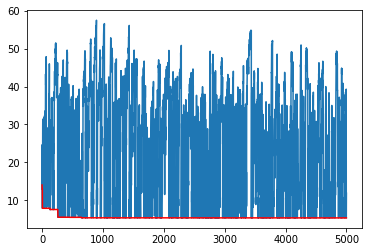

In [69]:
plotSamples(recx)

This is from our traveling salesman problem

In [70]:
recx[-1,:]

array([-3.15128655e+00,  1.18821794e+01,  7.33555921e-01,  5.35748041e+00,
        1.31093346e-09])